We will be using beautiful soup for parsing the html

In [134]:
!pip install beautifulsoup4

In [135]:
import bs4
import os

In [136]:
filenames = os.listdir()
filenames

['.config',
 'page5.html',
 'page3.html',
 'page1.html',
 'page4.html',
 'page2.html',
 'Registered_submission.csv',
 '.ipynb_checkpoints',
 'registrationv10.csv',
 'page56.html',
 'sample_data']

In [137]:
"""Some tags have different class names ending with rg_3
In following lines of code we change such class names so that they end with rg_5
"""
for filename in filenames:
    if(filename.endswith(".html") and (filename is not "Registered_submission.csv") and (filename is not "Unregistered_submission.csv")):
        print(filename)
        file = open(filename,"r+")
        str=file.read().replace("rg_3","rg_5")
        #print(str)
        file.seek(0)
        file.write(str)
        file.close()

page5.html
page3.html
page1.html
page4.html
page2.html
page56.html


In [138]:
score_count=0 #variable to count score for data verification
usernames_list=[]
scores_list=[]
for filename in filenames:
    if(filename.endswith(".html")):
        print(filename,end=" ")
        file = open(filename)
        hr_parser = bs4.BeautifulSoup(file, "html.parser")
        usernames=hr_parser.find_all(name="a",attrs={"class":"cursor leaderboard-hackername rg_5"})
        for username in usernames:
            #print(username.contents[0].strip())
            usernames_list.append(username.contents[0].strip())
        print(f"Usernames = {len(usernames)}")

        scores=hr_parser.find_all(name="div",attrs={"class":"span-flex-3"})
        for score in scores:
            #print(len(score.contents[1].contents), score.contents[1].contents )
            if len(score.contents[1].contents)==1:
                #print(score.contents[1].contents[0].strip())
                scores_list.append(score.contents[1].contents[0].strip())
                score_count+=1
        file.close()
print(f"Total username = {len(usernames_list)}")
print(f"Total scores = {score_count}")

page5.html Usernames = 100
page3.html Usernames = 100
page1.html Usernames = 100
page4.html Usernames = 100
page2.html Usernames = 100
page56.html Usernames = 53
Total username = 553
Total scores = 553


In [139]:
usernames_list_mapped=map(lambda x: x.lower().strip(), usernames_list)
usernames_list=[]
for un in usernames_list_mapped:
    usernames_list.append(un)
usernames_list

['ujjwal_2024it101',
 'sec_n_1134',
 '_sec_r_1003',
 'sec_n_1106',
 'piyush_2024en112',
 'sec_n_1012',
 'sec_r_1036',
 'anshika_2024cse1',
 'sec_r_1166',
 'raka7317',
 'sec_n_1057',
 'sec_n_1110',
 'sec_n_1101',
 'sec_t_cse1160',
 'kushagrasingh852',
 'sarthak_2024csi1',
 'kartik_2024en101',
 'prakhar_2024csi1',
 'rahul_2024csit12',
 'sec_b_1086',
 'sec_k_1167',
 'sec_u_csit1064',
 'sec_l_1160',
 'sec_m_1029',
 'mahesh_2024en101',
 'sec_j_1107',
 'malvika_2024en11',
 'sec_b_1138',
 'sec_o_ec1184',
 'sec_s_en1108',
 'sec_e_1154',
 'sec_u_ece1103',
 'sec_a_1125',
 'sec_v_cs1007',
 'harshita_2024en1',
 'sec_b_1178',
 'anjuman_k_1157',
 'samridhi_2024cs1',
 'sec_b_1009',
 'sec_s_cse_1067',
 'pratapakshay096',
 'sec_t_1044',
 'rider_sid',
 'shruti_2024cs101',
 'pranjal_2024ec11',
 'sec_v_1014',
 'divyajyoti_20241',
 'sec_n_1155',
 'aditya_2024cs101',
 'secu_prashantpal',
 'sec_e_1056',
 'sk2501',
 'sec_i_1089',
 'sec_w_md_faizal',
 'sec_x_1024',
 'sec_b_1062',
 'sec_d__1088',
 'divyanshrai0

In [140]:
"""
#To download extracted usernames in csv format
sample=pd.DataFrame(usernames_list,columns=["username"])
sample.to_csv("total_username.csv")
"""

'\n#To download extracted usernames in csv format\nsample=pd.DataFrame(usernames_list,columns=["username"])\nsample.to_csv("total_username.csv")\n'

In [141]:
import pandas as pd
import os
files=os.listdir()

In [142]:
#Opening the student registration .csv file
f=None
for f in files:
    if f.endswith(".csv") and (f is not "Registered_submission.csv") and (f is not "Unregistered_submission.csv"):
        break
f

'Registered_submission.csv'

In [143]:
df = pd.read_csv(f)
df

,Unnamed: 0,Unnamed: 0.1,Timestamp,Email Address,Complete Name,Father's Name,Section,Branch,Official KIET Email ID,University Roll Number of AKTU,Class Roll Number,KIET Library ID,username,Phone Number,Scores
0,0,1,6/2/2021 17:27:12,utkarsh.2024ec1056@kiet.edu,Utkarsh Tripathi,Rajeev Kumar Tripathi,K,ECE,NaN,2000290310181,NaN,2024ec1056,utkarsh_ec_1056k,9555280997,400.0
1,1,2,6/2/2021 17:29:31,nanditayadav1711@gmail.com,Nandita Yadav,Mr. Parvesh Yadav,K,CS,nandita.2024cs1114@kiet.edu,2000290120100,NaN,2024cs1114,sec_k_cs1114,7457017669,200.0
2,2,3,6/2/2021 17:35:22,abdul.2024csit1070@kiet.edu,AbdulQuadir,Shakeel khan,O,CSIT,abdul.2024csit1070@kiet.edu,2000290110005,NaN,2024CSIT1070,abdul_2024csit12,7906739627,400.0
3,3,4,6/2/2021 17:35:42,sujaltyagi03@gmail.com,Sujal Tyagi,Narendra Tyagi,F,EN,sujal.2024en1014@kiet.edu,2000290210137,NaN,2024en1014,sec_f_1014,9548609022,400.0
4,4,9,6/2/2021 17:38:52,anjuman.2024cse1157@kiet.edu,Anjuman Hasan,Hasan Zaighum,K,CSE,NaN,2000190100023,NaN,2024cse1157,anjuman_k_1157,9307722734,275.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,450,951,6/6/2021 16:01:56,shikhar71raj@gmail.com,Shikhar Raj,Late Mr Hansraj,W,CS,shikhar.2024cs1068@kiet.edu,2000290120144,45.0,2024cs1068,sec_w_shikharraj,9315119875,400.0
451,451,952,6/6/2021 16:30:57,siddharth.2024ec1142@kiet.edu,Siddharth Goswami,Dhananjay Goswami,E,ECE,siddharth.2024ec1142@kiet.edu,2000290310168,43.0,2024ec1142,sec_e_2024ec1142,9369642278,200.0
452,452,954,6/6/2021 18:06:00,mohd.2024me1069@kiet.edu,Mohd Azam,Mohd Aslam,B,ME,mohd.2024me1069@kiet.edu,2000290400071,30.0,2024ME1069,sec_b_1069,9455675223,400.0
453,453,956,6/6/2021 18:10:26,asthana.2024ec1160@kiet.edu,Asthana somya subhash,Subhash asthana,B,ECE,asthana.2024ec1160@kiet.edu,2000290310050,15.0,2024ec1160,sec_b_1160,8738023479,400.0


In [144]:
df=df.rename(columns = {"Enter Your Official HackerRank Username": "username"})

In [145]:
type(df["username"])

pandas.core.series.Series

In [146]:
df["username"] = df["username"].apply(lambda x: x.lower().strip())
df["username"]

0      utkarsh_ec_1056k
1          sec_k_cs1114
2      abdul_2024csit12
3            sec_f_1014
4        anjuman_k_1157
             ...       
450    sec_w_shikharraj
451    sec_e_2024ec1142
452          sec_b_1069
453          sec_b_1160
454    shivam_2024en101
Name: username, Length: 455, dtype: object

In [147]:
#iterate over the extracted usernames in HackerRank submission and find out the records from registration form csv
filtered_submission=pd.DataFrame()
filtered_submission = pd.concat([filtered_submission,df.loc[df['username'].isin(usernames_list)]])
print(f"\n\n ")   
filtered_submission.drop_duplicates(subset ="username",keep = 'last', inplace = True)
print(filtered_submission.count())
filtered_submission



 
Unnamed: 0                        455
Unnamed: 0.1                      455
Timestamp                         455
Email Address                     455
Complete Name                     455
Father's Name                     455
Section                           455
Branch                            455
Official KIET Email ID            303
University Roll Number of AKTU    455
Class Roll Number                 434
KIET Library ID                   455
username                          455
Phone Number                      455
Scores                            455
dtype: int64


,Unnamed: 0,Unnamed: 0.1,Timestamp,Email Address,Complete Name,Father's Name,Section,Branch,Official KIET Email ID,University Roll Number of AKTU,Class Roll Number,KIET Library ID,username,Phone Number,Scores
0,0,1,6/2/2021 17:27:12,utkarsh.2024ec1056@kiet.edu,Utkarsh Tripathi,Rajeev Kumar Tripathi,K,ECE,NaN,2000290310181,NaN,2024ec1056,utkarsh_ec_1056k,9555280997,400.0
1,1,2,6/2/2021 17:29:31,nanditayadav1711@gmail.com,Nandita Yadav,Mr. Parvesh Yadav,K,CS,nandita.2024cs1114@kiet.edu,2000290120100,NaN,2024cs1114,sec_k_cs1114,7457017669,200.0
2,2,3,6/2/2021 17:35:22,abdul.2024csit1070@kiet.edu,AbdulQuadir,Shakeel khan,O,CSIT,abdul.2024csit1070@kiet.edu,2000290110005,NaN,2024CSIT1070,abdul_2024csit12,7906739627,400.0
3,3,4,6/2/2021 17:35:42,sujaltyagi03@gmail.com,Sujal Tyagi,Narendra Tyagi,F,EN,sujal.2024en1014@kiet.edu,2000290210137,NaN,2024en1014,sec_f_1014,9548609022,400.0
4,4,9,6/2/2021 17:38:52,anjuman.2024cse1157@kiet.edu,Anjuman Hasan,Hasan Zaighum,K,CSE,NaN,2000190100023,NaN,2024cse1157,anjuman_k_1157,9307722734,275.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,450,951,6/6/2021 16:01:56,shikhar71raj@gmail.com,Shikhar Raj,Late Mr Hansraj,W,CS,shikhar.2024cs1068@kiet.edu,2000290120144,45.0,2024cs1068,sec_w_shikharraj,9315119875,400.0
451,451,952,6/6/2021 16:30:57,siddharth.2024ec1142@kiet.edu,Siddharth Goswami,Dhananjay Goswami,E,ECE,siddharth.2024ec1142@kiet.edu,2000290310168,43.0,2024ec1142,sec_e_2024ec1142,9369642278,200.0
452,452,954,6/6/2021 18:06:00,mohd.2024me1069@kiet.edu,Mohd Azam,Mohd Aslam,B,ME,mohd.2024me1069@kiet.edu,2000290400071,30.0,2024ME1069,sec_b_1069,9455675223,400.0
453,453,956,6/6/2021 18:10:26,asthana.2024ec1160@kiet.edu,Asthana somya subhash,Subhash asthana,B,ECE,asthana.2024ec1160@kiet.edu,2000290310050,15.0,2024ec1160,sec_b_1160,8738023479,400.0


In [148]:
#to create a csv file of students whose username matched with registration contest registration form
#filtered_submission["username"].to_csv("results.csv")

In [149]:
#Find the scores of the filtered students
scores_filtered = []
unique_usernames = set()

#Adding scores to the filtered details of students
for un_filtered in filtered_submission["username"]:
    for un, score in zip(usernames_list, list(scores_list)):
        if un_filtered == un and (un not in unique_usernames):#ensuring no duplicacy of usernames
            #print(f"Filtered_username: {un} Score: {score}")
            scores_filtered.append(score)
            unique_usernames.add(un)
len(scores_filtered)

455

In [150]:
#adding a new column to filtered submission
filtered_submission["Scores"]=scores_filtered
filtered_submission

,Unnamed: 0,Unnamed: 0.1,Timestamp,Email Address,Complete Name,Father's Name,Section,Branch,Official KIET Email ID,University Roll Number of AKTU,Class Roll Number,KIET Library ID,username,Phone Number,Scores
0,0,1,6/2/2021 17:27:12,utkarsh.2024ec1056@kiet.edu,Utkarsh Tripathi,Rajeev Kumar Tripathi,K,ECE,NaN,2000290310181,NaN,2024ec1056,utkarsh_ec_1056k,9555280997,400.00
1,1,2,6/2/2021 17:29:31,nanditayadav1711@gmail.com,Nandita Yadav,Mr. Parvesh Yadav,K,CS,nandita.2024cs1114@kiet.edu,2000290120100,NaN,2024cs1114,sec_k_cs1114,7457017669,200.00
2,2,3,6/2/2021 17:35:22,abdul.2024csit1070@kiet.edu,AbdulQuadir,Shakeel khan,O,CSIT,abdul.2024csit1070@kiet.edu,2000290110005,NaN,2024CSIT1070,abdul_2024csit12,7906739627,400.00
3,3,4,6/2/2021 17:35:42,sujaltyagi03@gmail.com,Sujal Tyagi,Narendra Tyagi,F,EN,sujal.2024en1014@kiet.edu,2000290210137,NaN,2024en1014,sec_f_1014,9548609022,400.00
4,4,9,6/2/2021 17:38:52,anjuman.2024cse1157@kiet.edu,Anjuman Hasan,Hasan Zaighum,K,CSE,NaN,2000190100023,NaN,2024cse1157,anjuman_k_1157,9307722734,275.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,450,951,6/6/2021 16:01:56,shikhar71raj@gmail.com,Shikhar Raj,Late Mr Hansraj,W,CS,shikhar.2024cs1068@kiet.edu,2000290120144,45.0,2024cs1068,sec_w_shikharraj,9315119875,400.00
451,451,952,6/6/2021 16:30:57,siddharth.2024ec1142@kiet.edu,Siddharth Goswami,Dhananjay Goswami,E,ECE,siddharth.2024ec1142@kiet.edu,2000290310168,43.0,2024ec1142,sec_e_2024ec1142,9369642278,200.00
452,452,954,6/6/2021 18:06:00,mohd.2024me1069@kiet.edu,Mohd Azam,Mohd Aslam,B,ME,mohd.2024me1069@kiet.edu,2000290400071,30.0,2024ME1069,sec_b_1069,9455675223,400.00
453,453,956,6/6/2021 18:10:26,asthana.2024ec1160@kiet.edu,Asthana somya subhash,Subhash asthana,B,ECE,asthana.2024ec1160@kiet.edu,2000290310050,15.0,2024ec1160,sec_b_1160,8738023479,400.00


In [151]:
#To generate csv file of registered students who participated in the event
filtered_submission.to_csv("Registered_submission.csv")

In [152]:
unfiltered_submissions=[]
for un in usernames_list:
    un_df = [x for x in df["username"]]
    if un not in un_df:
        print(un) 
        unfiltered_submissions.append(un)
len(unfiltered_submissions)

ujjwal_2024it101
kartik_2024en101
mahesh_2024en101
malvika_2024en11
sec_o_ec1184
harshita_2024en1
pratapakshay096
divyajyoti_20241
sec_e_1056
kashishkc22
mihirksingh466
shreya_2024en101
ayushi_2024it111
mansimittal2003
tyagisatyam0247
pathakaashi2
shubhank_1008
kritish_shukla01
sec_u_1004
ahmadhamdan041
romit_2024en1156
sectionc2024cev
sec_m_040_
sec_x_ec1047
rajneesh_2024it1
sec_b_1073
sakshi_2024en101
saeedamrohvi
rudransh9119
ananya_2024me101
saksham_2024cs11
sec_i_1068
samarth_2024ce11
mayank_2024ce101
gulshankalwani02
amit_2024me1030
arshivaastha
ravi_2024me1072
shanutyagi560
ujjawal_2024en11
sec_m_010
section_l_rajani
sec_i_040
akash_2024ec1200
sec_a_1063
swati_2024en1146
sachin_2024cs101
sec_s_csit1170
shreyansh_2024m1
sec_x_1185
riya_maheshwari
sec_m_051
sec_e_ce_1007
nikita_2024cs111
aashishraghav24
sec_e_1057
sec_x_cse1071
khyati_2024cse11
anvay_2024ec1053
e_arpit_mishra
nigam_2024ec1078
sec_x_1071
sec_e_1142
sec_r_1121
sec_n_1050
aryan_2024csit12
sec_n_1034
msharmaji143
mani

98

In [153]:
#To generate csv file of unregistered students who participated in the event
sample=pd.DataFrame(unfiltered_submissions,columns=["Unregistered Submissions"])
sample.to_csv("Unregistered_submission.csv")

## Plotting the Results

In [154]:
frequency = filtered_submission.groupby("Section").count()

In [155]:
frequency

,Unnamed: 0,Unnamed: 0.1,Timestamp,Email Address,Complete Name,Father's Name,Branch,Official KIET Email ID,University Roll Number of AKTU,Class Roll Number,KIET Library ID,username,Phone Number,Scores
Section,,,,,,,,,,,,,,
A,20,20,20,20,20,20,20,17,20,20,20,20,20,20
B,38,38,38,38,38,38,38,26,38,38,38,38,38,38
C,21,21,21,21,21,21,21,17,21,20,21,21,21,21
D,16,16,16,16,16,16,16,11,16,10,16,16,16,16
E,21,21,21,21,21,21,21,13,21,21,21,21,21,21
F,14,14,14,14,14,14,14,11,14,12,14,14,14,14
G,13,13,13,13,13,13,13,13,13,13,13,13,13,13
H,6,6,6,6,6,6,6,2,6,5,6,6,6,6
I,18,18,18,18,18,18,18,13,18,17,18,18,18,18


In [156]:
#adding count of unregistered users
import numpy as np
unreg = pd.DataFrame(np.repeat(len(unfiltered_submissions), len(frequency.columns))[None, :], 
                  columns=frequency.columns,
                  index=["Unregistered"])
#unreg["Timestamp"]=[dt_string]
#unreg
frequency = pd.concat([frequency, unreg])
frequency

,Unnamed: 0,Unnamed: 0.1,Timestamp,Email Address,Complete Name,Father's Name,Branch,Official KIET Email ID,University Roll Number of AKTU,Class Roll Number,KIET Library ID,username,Phone Number,Scores
A,20,20,20,20,20,20,20,17,20,20,20,20,20,20
B,38,38,38,38,38,38,38,26,38,38,38,38,38,38
C,21,21,21,21,21,21,21,17,21,20,21,21,21,21
D,16,16,16,16,16,16,16,11,16,10,16,16,16,16
E,21,21,21,21,21,21,21,13,21,21,21,21,21,21
F,14,14,14,14,14,14,14,11,14,12,14,14,14,14
G,13,13,13,13,13,13,13,13,13,13,13,13,13,13
H,6,6,6,6,6,6,6,2,6,5,6,6,6,6
I,18,18,18,18,18,18,18,13,18,17,18,18,18,18
J,20,20,20,20,20,20,20,13,20,19,20,20,20,20


In [157]:
frequency_sorted=frequency.sort_values("Timestamp")

In [158]:
frequency_sorted=frequency_sorted[["Timestamp"]]
frequency_sorted=frequency_sorted.rename(columns = {"Timestamp": "Submissions"})

In [159]:
t=zip(list(frequency_sorted.index),list(frequency_sorted["Submissions"]))
for i in t:
    print(i)

('H', 6)
('O', 9)
('G', 13)
('U', 14)
('F', 14)
('L', 14)
('D', 16)
('R', 16)
('X', 16)
('V', 17)
('W', 18)
('N', 18)
('I', 18)
('A', 20)
('J', 20)
('C', 21)
('P', 21)
('Q', 21)
('E', 21)
('M', 23)
('K', 24)
('S', 26)
('T', 31)
('B', 38)
('Unregistered', 98)


In [160]:
import statistics
mean_registration = statistics.mean(frequency_sorted["Submissions"])
mean_registration

22.12

In [161]:
import datetime
now = datetime.datetime.now()
# dd/mm/YY H:M:S
#dt_string = now.strftime("%d/%m/%Y %I:%M:%S %p")
dt_string = now.strftime("%d/%m/%Y")
dt_string

'06/06/2021'

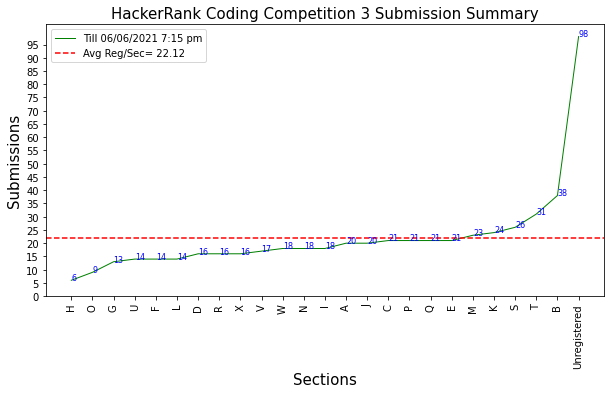

In [162]:
ax=frequency_sorted.plot(xlabel="Section",ylabel="Submissions",legend=False,figsize=(10, 5),color="green",linewidth=1,rot=90,fontsize=10)
ax.set_title("HackerRank Coding Competition 3 Submission Summary",fontsize=15)
ax.set_xlabel("Sections", fontsize=15)
ax.set_ylabel("Submissions", fontsize=15)
ax.set_xticks(range(len(list(frequency_sorted.index))))
ax.set_xticklabels(list(frequency_sorted.index))
ax.set_yticks(range(0,100,5))
ax.axhline(y=mean_registration, color='r', linestyle='--')
ax.legend([f"Till {dt_string} 7:15 pm",f"Avg Reg/Sec= {mean_registration}"],loc=2)
for xy in zip(range(len(list(frequency_sorted.index))),list(frequency_sorted["Submissions"])):                                       # <--
    ax.annotate(s=xy[1],xy=xy,color="blue",fontsize=8)

# Pie Chart

A Pie chart representing total participation wrt to total first year students

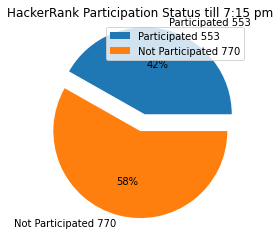

In [163]:
import matplotlib.pyplot as plt

y = np.array([len(usernames_list), 1323-len(usernames_list)])
myexplode = [0.2, 0 ]
plt.pie(y, labels=[f"Participated {len(usernames_list)}", f"Not Participated {1323-len(usernames_list)}"],autopct='%1.0f%%',explode=myexplode)
plt.legend()
plt.title(f"HackerRank Participation Status till 7:15 pm")
plt.show()

Text(0, 0.5, 'Submissions')

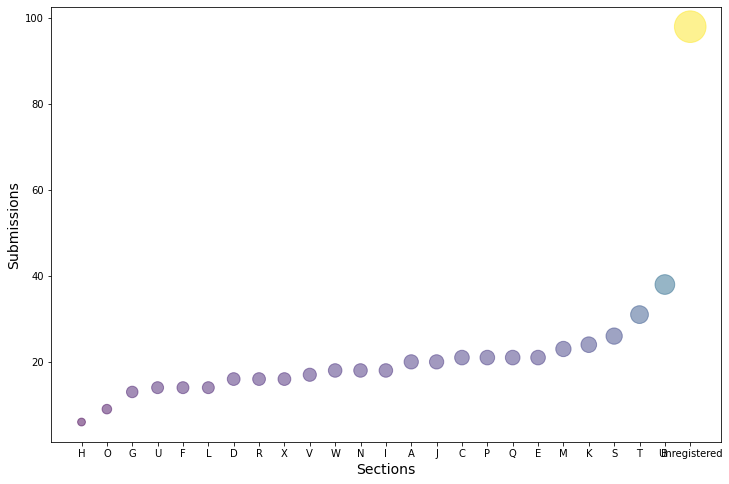

In [171]:
plt.figure(figsize=(12, 8))

c_br = (frequency_sorted["Submissions"])
f_normal = (frequency_sorted["Submissions"]) / (frequency_sorted["Submissions"]).max()

plt.scatter(frequency_sorted.index, frequency_sorted["Submissions"], 
                  c=c_br,
                 alpha=0.5,
                s = f_normal * 1000
                )

plt.xlabel("Sections", size=14)
plt.ylabel("Submissions", size=14)